## Epsilon-Greedy Approach

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

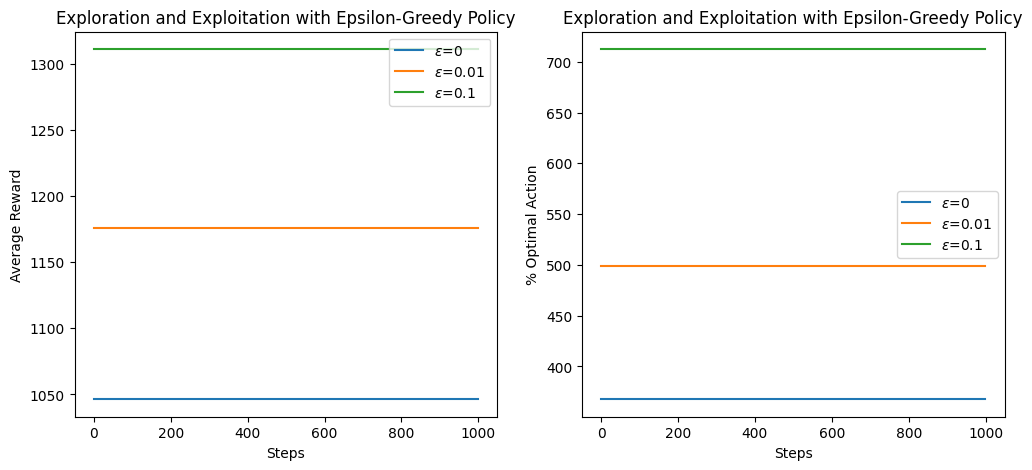

In [19]:
class Bandit:
    def __init__(self, n_arms):
        self.n_arms = n_arms
        self.mean = np.random.normal(0, 1, size=n_arms)

    def pull_arm(self, arm):
        return np.random.normal(self.mean[arm], 1)

#Defining epsilon greedy policy
def egp(Q, epsilon):
    if np.random.random() < epsilon: # epsilon # Exploration
        return np.random.randint(len(Q))
    else: # 1 - epsilon # Exploitation
        return np.argmax(Q)

n_arms = 10
n_steps = 1000
n_trials = 2000
epsilons = [0, 0.01, 0.1]  # Different values of epsilon to try

# Initialize variables for plotting
average_rewards = np.zeros((len(epsilons), n_steps))
optimal_action_pct = np.zeros((len(epsilons), n_steps))

for i, epsilon in enumerate(epsilons):
    for j in range(n_trials):
        bandit = Bandit(n_arms)
        Q = np.zeros(n_arms)
        N = np.zeros(n_arms)
        total_reward = 0
        optimal_action_count = 0

        for step in range(n_steps):
            action = egp(Q, epsilon)
            # print(action)
            reward = bandit.pull_arm(action)
            total_reward += reward
            # print(total_reward)
            N[action] += 1
            Q[action] += (reward - Q[action]) / N[action]
            optimal_action = np.argmax(bandit.mean)
            optimal_action_count += (action == optimal_action)

        average_rewards[i] += total_reward / n_trials
        # print(average_rewards[i])
        optimal_action_pct[i] += optimal_action_count / n_trials
        # print(optimal_action_pct[i])


fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for i, epsilon in enumerate(epsilons):
    axs[0].plot(average_rewards[i], label="$\epsilon$={}".format(epsilon))
    axs[1].plot(optimal_action_pct[i], label="$\epsilon$={}".format(epsilon))

axs[0].set_xlabel("Steps")
axs[0].set_ylabel("Average Reward")
axs[0].set_title("Exploration and Exploitation with Epsilon-Greedy Policy")
axs[0].legend()

axs[1].set_xlabel("Steps")
axs[1].set_ylabel("% Optimal Action")
axs[1].set_title("Exploration and Exploitation with Epsilon-Greedy Policy")
axs[1].legend()

plt.show()

## Boltzmann Exploration

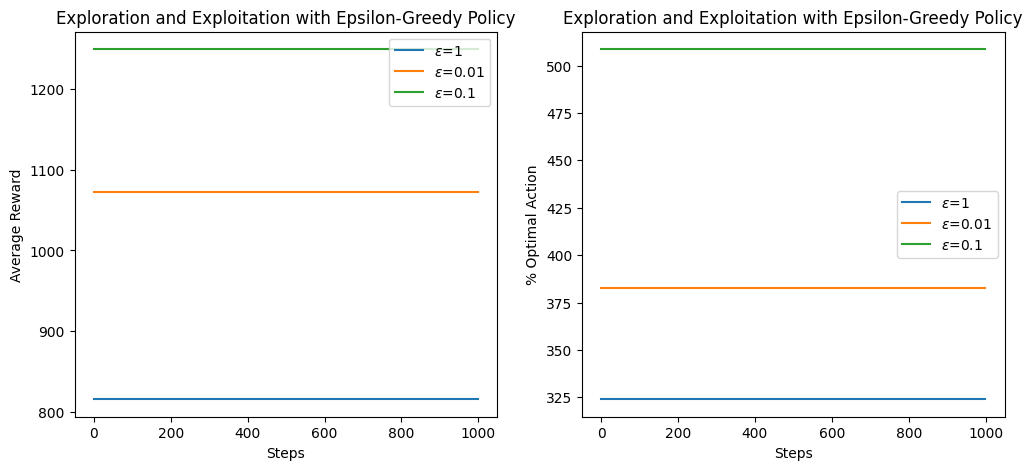

In [21]:
class Bandit:
    def __init__(self, n_arms):
        self.n_arms = n_arms
        self.mean = np.random.normal(0, 1, size=n_arms)

    def pull_arm(self, arm):
        return np.random.normal(self.mean[arm], 1)

#Defining boltzman exploration policy
def bp(Q, epsilon):
    exp_Q = np.exp(Q/epsilon) # High epsilon means exploration, low epsilon means exploitation (action with the highest Q-value is chosen more frequently)
    prob = exp_Q / np.sum(exp_Q) # softmax
    return np.random.choice(len(Q), p = prob)

n_arms = 10
n_steps = 1000
n_trials = 2000
epsilons = [1, 0.01, 0.1]  # Different values of epsilon to try

# Initialize variables for plotting
average_rewards = np.zeros((len(epsilons), n_steps))
optimal_action_pct = np.zeros((len(epsilons), n_steps))

for i, epsilon in enumerate(epsilons):
    for j in range(n_trials):
        bandit = Bandit(n_arms)
        Q = np.zeros(n_arms)
        N = np.zeros(n_arms)
        total_reward = 0
        optimal_action_count = 0

        for step in range(n_steps):
            action = bp(Q, epsilon)
            reward = bandit.pull_arm(action)
            total_reward += reward
            N[action] += 1
            Q[action] += (reward - Q[action]) / N[action]
            optimal_action = np.argmax(bandit.mean)
            optimal_action_count += (action == optimal_action)

        average_rewards[i] += total_reward / n_trials
        optimal_action_pct[i] += optimal_action_count / n_trials

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for i, epsilon in enumerate(epsilons):
    axs[0].plot(average_rewards[i], label="$\epsilon$={}".format(epsilon))
    axs[1].plot(optimal_action_pct[i], label="$\epsilon$={}".format(epsilon))

axs[0].set_xlabel("Steps")
axs[0].set_ylabel("Average Reward")
axs[0].set_title("Exploration and Exploitation with Epsilon-Greedy Policy")
axs[0].legend()

axs[1].set_xlabel("Steps")
axs[1].set_ylabel("% Optimal Action")
axs[1].set_title("Exploration and Exploitation with Epsilon-Greedy Policy")
axs[1].legend()

plt.show()
